Filename: /Users/wavefunction/Downloads/COSG130M_sid569251_1.5Rvir_short10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     16   30001R x 4C   [E, E, E, E]   
Columns: ColDefs(
    name = 'wavelength'; format = 'E'
    name = 'tau'; format = 'E'
    name = 'flux'; format = 'E'
    name = 'flux_error'; format = 'E'
)


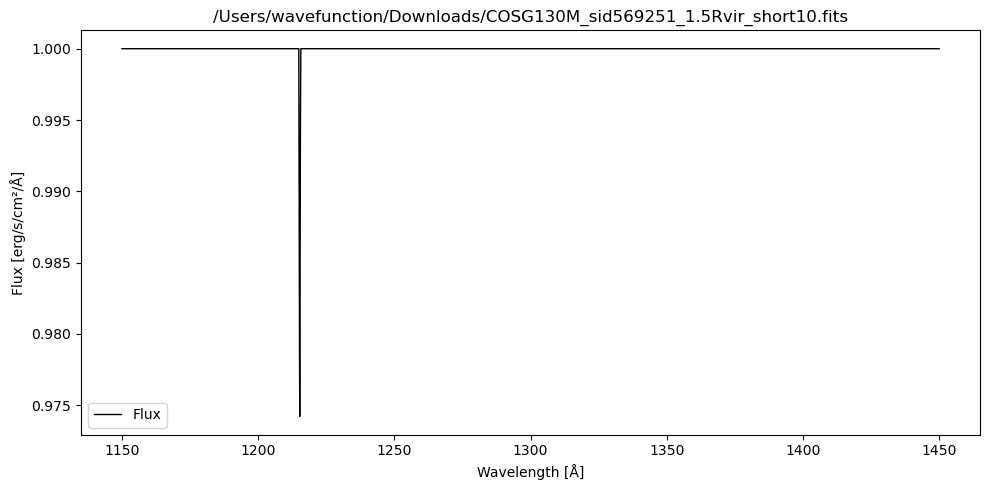

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

# --- Load the FITS file ---
filename = "/Users/wavefunction/Downloads/COSG130M_sid569251_1.5Rvir_short10.fits"
hdul = fits.open(filename)

# Print basic info about the FITS structure
hdul.info()

# Look at the first extension (often contains data)
data = hdul[1].data   # extension 1 usually has the spectrum table

# Print the available columns
print("Columns:", data.columns)

# Extract wavelength and flux (adjust column names if different)
wavelength = data['wavelength']   # or check column names in print above
flux = data['flux']

# Optional: check errors if available
if 'error' in data.columns.names:
    error = data['error']
else:
    error = None

# --- Plot the spectrum ---
plt.figure(figsize=(10,5))
plt.plot(wavelength, flux, color='black', lw=1, label='Flux')

if error is not None:
    plt.fill_between(wavelength, flux-error, flux+error,
                     color='gray', alpha=0.4, label='Error')

plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux [erg/s/cm²/Å]")  # adjust if units differ
plt.title(filename)
plt.legend()
plt.tight_layout()
plt.show()

# Close the FITS file
hdul.close()

ColDefs(
    name = 'wavelength'; format = 'E'
    name = 'tau'; format = 'E'
    name = 'flux'; format = 'E'
    name = 'flux_error'; format = 'E'
)


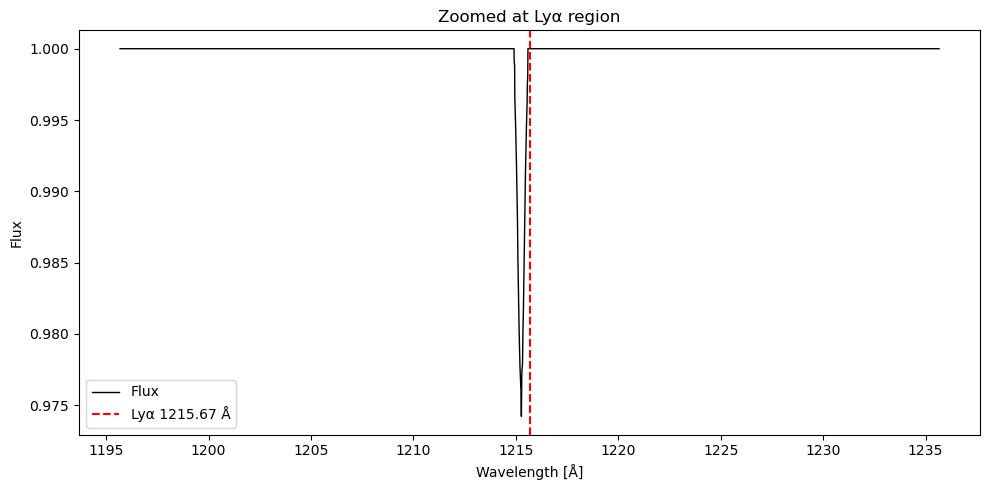

In [2]:
hdul = fits.open(filename)
data = hdul[1].data

# check what the FITS file has
print(data.columns)

# replace with correct column names after inspecting
wavelength = data['wavelength']
flux = data['flux']

# error if present
error = data['error'] if 'error' in data.columns.names else None

# --- Zoom around Lyα ---
lya_rest = 1215.67  # Angstrom
window = 20         # zoom window +/- Å

mask = (wavelength > (lya_rest - window)) & (wavelength < (lya_rest + window))

plt.figure(figsize=(10,5))
plt.plot(wavelength[mask], flux[mask], color='black', lw=1, label='Flux')

if error is not None:
    plt.fill_between(wavelength[mask],
                     flux[mask] - error[mask],
                     flux[mask] + error[mask],
                     color='gray', alpha=0.4, label='Error')

plt.axvline(lya_rest, color='red', linestyle='--', lw=1.5, label='Lyα 1215.67 Å')
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux")
plt.title("Zoomed at Lyα region")
plt.legend()
plt.tight_layout()
plt.show()

hdul.close()